In [1]:
import os
from predictor import Predictor as predictor

import cv2 
import os 
from imutils import perspective
import numpy as np 
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from imutils import perspective

import cv2 
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image

# HOME = os.getcwd()
HOME = f"C:\\Users\\mhajj\\Documents\\RUTILEA\\Signateprojects"

images_path = f"{HOME}\\dataset\\train\\images"
annotation_path = f"{HOME}\\dataset\\train\\annotation"

print("Number of Training images are", len(os.listdir(images_path)))

Number of Training images are 247


In [2]:
import os
import json
from tqdm import tqdm

count = 0
annotations = []  # Create a list to store all annotations

for i in tqdm(os.listdir(images_path)):
    img_path = os.path.join(images_path, i)
    annotation_file_path = os.path.join(annotation_path, i.split(".")[0] + ".json")
    
    try:
        with open(annotation_file_path, "r") as json_file:
            annotation_data = json.load(json_file)
            
            # Extract the data you need from the loaded JSON
            nutrition_facts = annotation_data.get("nutrition_facts")
            calory = annotation_data.get("calory")

            # Create the annotation dictionary
            annotation = {
                "nutrition_facts": nutrition_facts,
                "calory": calory
            }

            annotations.append(annotation)
            
    except FileNotFoundError:
        continue

    count += 1

# Write all annotations to a JSON file
with open("train_annotations.json", "w") as json_file:
    json.dump(annotations, json_file, indent=4)

print("Total number of Annotations created for Training are", count)

100%|██████████| 247/247 [00:00<00:00, 22161.23it/s]

Total number of Annotations created for Training are 247


In [3]:
count = 0
annotations = []  # Create a list to store all annotations

for i in tqdm(os.listdir(images_path)):
    img_path = os.path.join(images_path, i)
    annotation_file_path = os.path.join(annotation_path, i.split(".")[0] + ".json")
    
    try:
        with open(annotation_file_path, "r") as json_file:
            annotation_data = json.load(json_file)

            # Extract the data you need from the loaded JSON
            nutrition_facts = annotation_data.get("nutrition_facts")
            calory = annotation_data.get("calory")

            # Create the annotation dictionary
            annotation = {
                "nutrition_facts": nutrition_facts,
                "calory": calory
            }

            annotations.append(annotation)
            
    except FileNotFoundError:
        continue

    count += 1

# Write all annotations to a JSON file
with open("test_annotations.json", "w") as json_file:
    json.dump(annotations, json_file, indent=4)

print("Total number of Annotations created for Test/Eval are", count)

100%|██████████| 247/247 [00:00<00:00, 30882.76it/s]

Total number of Annotations created for Test/Eval are 247


In [4]:
# Create a PaddleOCR instance with your desired configuration
custom_ocr = PaddleOCR(
    use_angle_cls=True,
    use_gpu=True,
    show_log=False
)

In [7]:
custom_ocr = PaddleOCR(
    use_angle_cls=True,
    rec_model_dir='..\\model\\PaddleOCR\\inference\\en_PP-OCRv3_rec',
    det_model_dir='..\\model\\PaddleOCR\\output\\det_db_inference',
    # rec_char_dict_path='..\\model\\PaddleOCR\\ppocr\\utils\\dict90.txt',
    lang='en',  
    use_gpu=True,
    show_log=True
)

In [8]:
# img_path = "C:\\Users\\mhajj\\Documents\\RUTILEA\\Signateprojects\\dataset\\train\\images\\000.jpg"
results = custom_ocr.ocr(img_path)

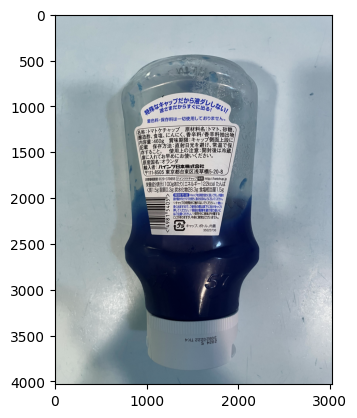

In [9]:
# img_path = "..\\dataset\\train\\images\\000.jpg"
img = cv2.imread(img_path)
plt.imshow(img)

In [10]:
img

array([[[181, 197, 204],
        [185, 201, 208],
        [181, 197, 204],
        ...,
        [187, 201, 213],
        [182, 196, 208],
        [177, 191, 203]],

       [[186, 202, 209],
        [179, 195, 202],
        [175, 191, 198],
        ...,
        [178, 192, 204],
        [177, 191, 203],
        [175, 189, 201]],

       [[189, 205, 212],
        [175, 191, 198],
        [170, 186, 193],
        ...,
        [181, 195, 207],
        [182, 196, 208],
        [182, 196, 208]],

       ...,

       [[208, 214, 209],
        [207, 213, 208],
        [205, 211, 206],
        ...,
        [177, 187, 197],
        [178, 188, 198],
        [180, 190, 200]],

       [[208, 214, 209],
        [206, 212, 207],
        [204, 210, 205],
        ...,
        [177, 187, 197],
        [176, 186, 196],
        [179, 189, 199]],

       [[207, 213, 208],
        [205, 211, 206],
        [203, 209, 204],
        ...,
        [177, 187, 197],
        [175, 185, 195],
        [178, 188, 198]]

In [11]:
results = custom_ocr.ocr(img)

In [ ]:
results

[[[[[363.0, 132.0], [535.0, 120.0], [537.0, 145.0], [365.0, 156.0]],
   ('R', 0.6763219237327576)],
  [[[379.0, 151.0], [571.0, 141.0], [572.0, 171.0], [381.0, 180.0]],
   ('<', 0.8283507823944092)],
  [[[204.0, 181.0], [313.0, 144.0], [323.0, 172.0], [213.0, 209.0]],
   (':61g', 0.8848433494567871)],
  [[[389.0, 181.0], [533.0, 167.0], [535.0, 189.0], [391.0, 203.0]],
   ('883', 0.9450633525848389)],
  [[[397.0, 215.0], [532.0, 200.0], [534.0, 223.0], [400.0, 237.0]],
   ('Cltth', 0.692043662071228)],
  [[[401.0, 259.0], [593.0, 240.0], [596.0, 266.0], [404.0, 286.0]],
   ('161g', 0.9310870170593262)],
  [[[493.0, 278.0], [623.0, 271.0], [624.0, 296.0], [495.0, 303.0]],
   ('K8.5', 0.7504926919937134)],
  [[[413.0, 293.0], [487.0, 283.0], [490.0, 304.0], [416.0, 314.0]],
   ('70kcal', 0.9859314560890198)],
  [[[498.0, 302.0], [627.0, 290.0], [629.0, 315.0], [501.0, 327.0]],
   ('26', 0.5999826192855835)],
  [[[306.0, 316.0], [375.0, 300.0], [380.0, 323.0], [311.0, 339.0]],
   ('IRL', 

In [12]:
if not results:
    print("No text found in the image.")
else:
    # Process the OCR results
    for result in results[0]:
        _, (text, confidence) = result
        print(f'Text: {text}, Confidence: {confidence}')

Text: +y, Confidence: 0.5869491696357727
Text: #3, Confidence: 0.8070155382156372
Text: n<t, Confidence: 0.6470814347267151
Text: T, Confidence: 0.7318122982978821
Text: 11-85055-20-8, Confidence: 0.8538439273834229
Text: 0120-370655+http:/ketchup.jp, Confidence: 0.9199243187904358
Text: *(100gt-122kcal tchl, Confidence: 0.8366607427597046
Text: 1.5g0.3g28.3g1.5g, Confidence: 0.9606475830078125
Text: ^, Confidence: 0.7564969658851624
Text: bnt=E5.OOT<ttll., Confidence: 0.5241956114768982
Text: 5, Confidence: 0.8875568509101868
Text: 7#tyo#n<t.V, Confidence: 0.5832187533378601
Text: 3, Confidence: 0.7878438234329224
Text: tho, Confidence: 0.7311711311340332
Text: Ftytb, Confidence: 0.5726202726364136
Text: 35523736, Confidence: 0.9984362125396729
Text: 30820222TK4, Confidence: 0.9436813592910767
Text: 5202, Confidence: 0.8920532464981079


In [ ]:
image = Image.open(img_path).convert('RGB')
boxes = [detection[0] for line in results for detection in line]
txts = [detection[1][0] for line in results for detection in line]
scores = [detection[1][1] for line in results for detection in line]

im_show = draw_ocr(image, boxes, txts, scores, font_path='simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result_ocr2.jpg')